In [1]:
import glob
import os
from datetime import date, timezone, timedelta
import pandas as pd
import numpy as np
from pylab import rcParams
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

In [3]:
sns.set_theme()
tqdm.pandas()

In [4]:
path = os.path.join(os.curdir, "datasets","5G-production-dataset")
files = glob.glob(path + "/**/*.csv", recursive=True)

In [5]:
print(path)

.\datasets\5G-production-dataset


In [6]:
len(files)

83

In [7]:
files[0].replace("\\","/").split('/')[3:-1]

['Amazon_Prime', 'Driving', 'animated-AdventureTime']

In [8]:
os.path.split(files[0])

('.\\datasets\\5G-production-dataset\\Amazon_Prime\\Driving\\animated-AdventureTime',
 'B_2019.11.28_07.27.57.csv')

In [9]:
listdf = []
for i, file in enumerate(files):
  file = file.replace("\\","/")
  df = pd.read_csv(file)
  folders_name = file.split('/')[3:-1]

  # It will identify if the user is static or moving.
  df["Mobility_Pattern"] = folders_name[1]
  folders_name.pop(1)

  # It will identify if the user is downloading or watching some streaming.
  df["User_Activity"] = ' '.join(folders_name)

  # It will identify if the user is downloading or watching some streaming.
  df["Log_Number"] = i

  listdf.append(df)

del df

No [dataset original](https://dl.acm.org/doi/pdf/10.1145/3339825.3394938) existe um total de 26 colunas, sendo eles respectivamente:
- **Timestamp**: Data/hora da amostra.
- **Longitude**: Coordenadas GPS do dispositivo móvel.
- **Latitude**: Coordenadas GPS do dispositivo móvel.
- **Speed**: Velocidade em Km/h do dispositivo móvel
- **Operatorname**: nome da operadora de celular (anonimizado).
- **CellID**: Celula Servidora para o dispositivo móvel.
- **NetworkMode**: Padrão de comunicação móvel (2G/3G/4G/5G).
- **RSRP**: Representa uma potência média sobre símbolos de referência específicos da célula transportados dentro de RE distintos. O RSRP é usado para medir a intensidade/cobertura do sinal da célula e, portanto, a seleção da célula (dBm).
- **RSRQ**: Representa uma relação entre RSRP e Sinal Recebido Indicador de Força (RSSI). A intensidade do sinal (qualidade do sinal) é medida em todos os elementos de recursos (RE), incluindo a interferência de todas as fontes (dB).
- **SNR**: valor da relação sinal-ruído (dB).
- **CQI**: Valor do Indicador de Qualidade do Canal (CQI) de um dispositivo móvel. CQI é um feedback fornecido pelo UE ao eNB. Indica a taxa de dados que pode ser transmitida por um canal (maior MCS com probabilidade de BLER menor que 10%), em função do SINR e das características do receptor do UE. Com base na previsão do UE do canal, o eNB seleciona um esquema de modulação e taxa de codificação apropriados.
- **RSSI**: RSSI representa uma potência recebida (banda larga) incluindo uma célula servidora e interferência e ruído de outras fontes. RSRQ, RSRP e RSSI são usados para medir a força/cobertura da célula e, portanto, a seleção da célula (transferência) (dBm).
- **DL_bitrate**: taxa de download medida no dispositivo (camada de aplicação)(kbps).
- **UL_bitrate**: taxa de uplink medida no dispositivo (camada de aplicação)(kbps).
- **State**: Estado do processo de download. Ele tem dois valores, *I (ocioso, sem download)* ou *D (fazendo download)*.
- **PINGAVG**: average ping statistics
- **PINGMIN**: minimum ping statistics
- **PINGMAX**: maximum ping statistics
- **PINGSTDEV**: standard deviation ping statistics
- **PINGLOSS**: loss ping statistics
- CELLHEX
- NODEHEX
- LACHEX
- RAWCELLID
- **NRxRSRP**: Valores para a célula vizinha.
- **NRxRSRQ**: Valores para a célula vizinha.

Porém como existiam varios arquivos de csv acabei criando mais duas colunas, sendo elas:
- Mobility_Pattern -- Para identificar se são dados de um equipamento estático ou em movimento.
- User_Activity -- Para identificar se o usuario está fazendo download ou assistindo streaming.

<Axes: xlabel='x', ylabel='y'>

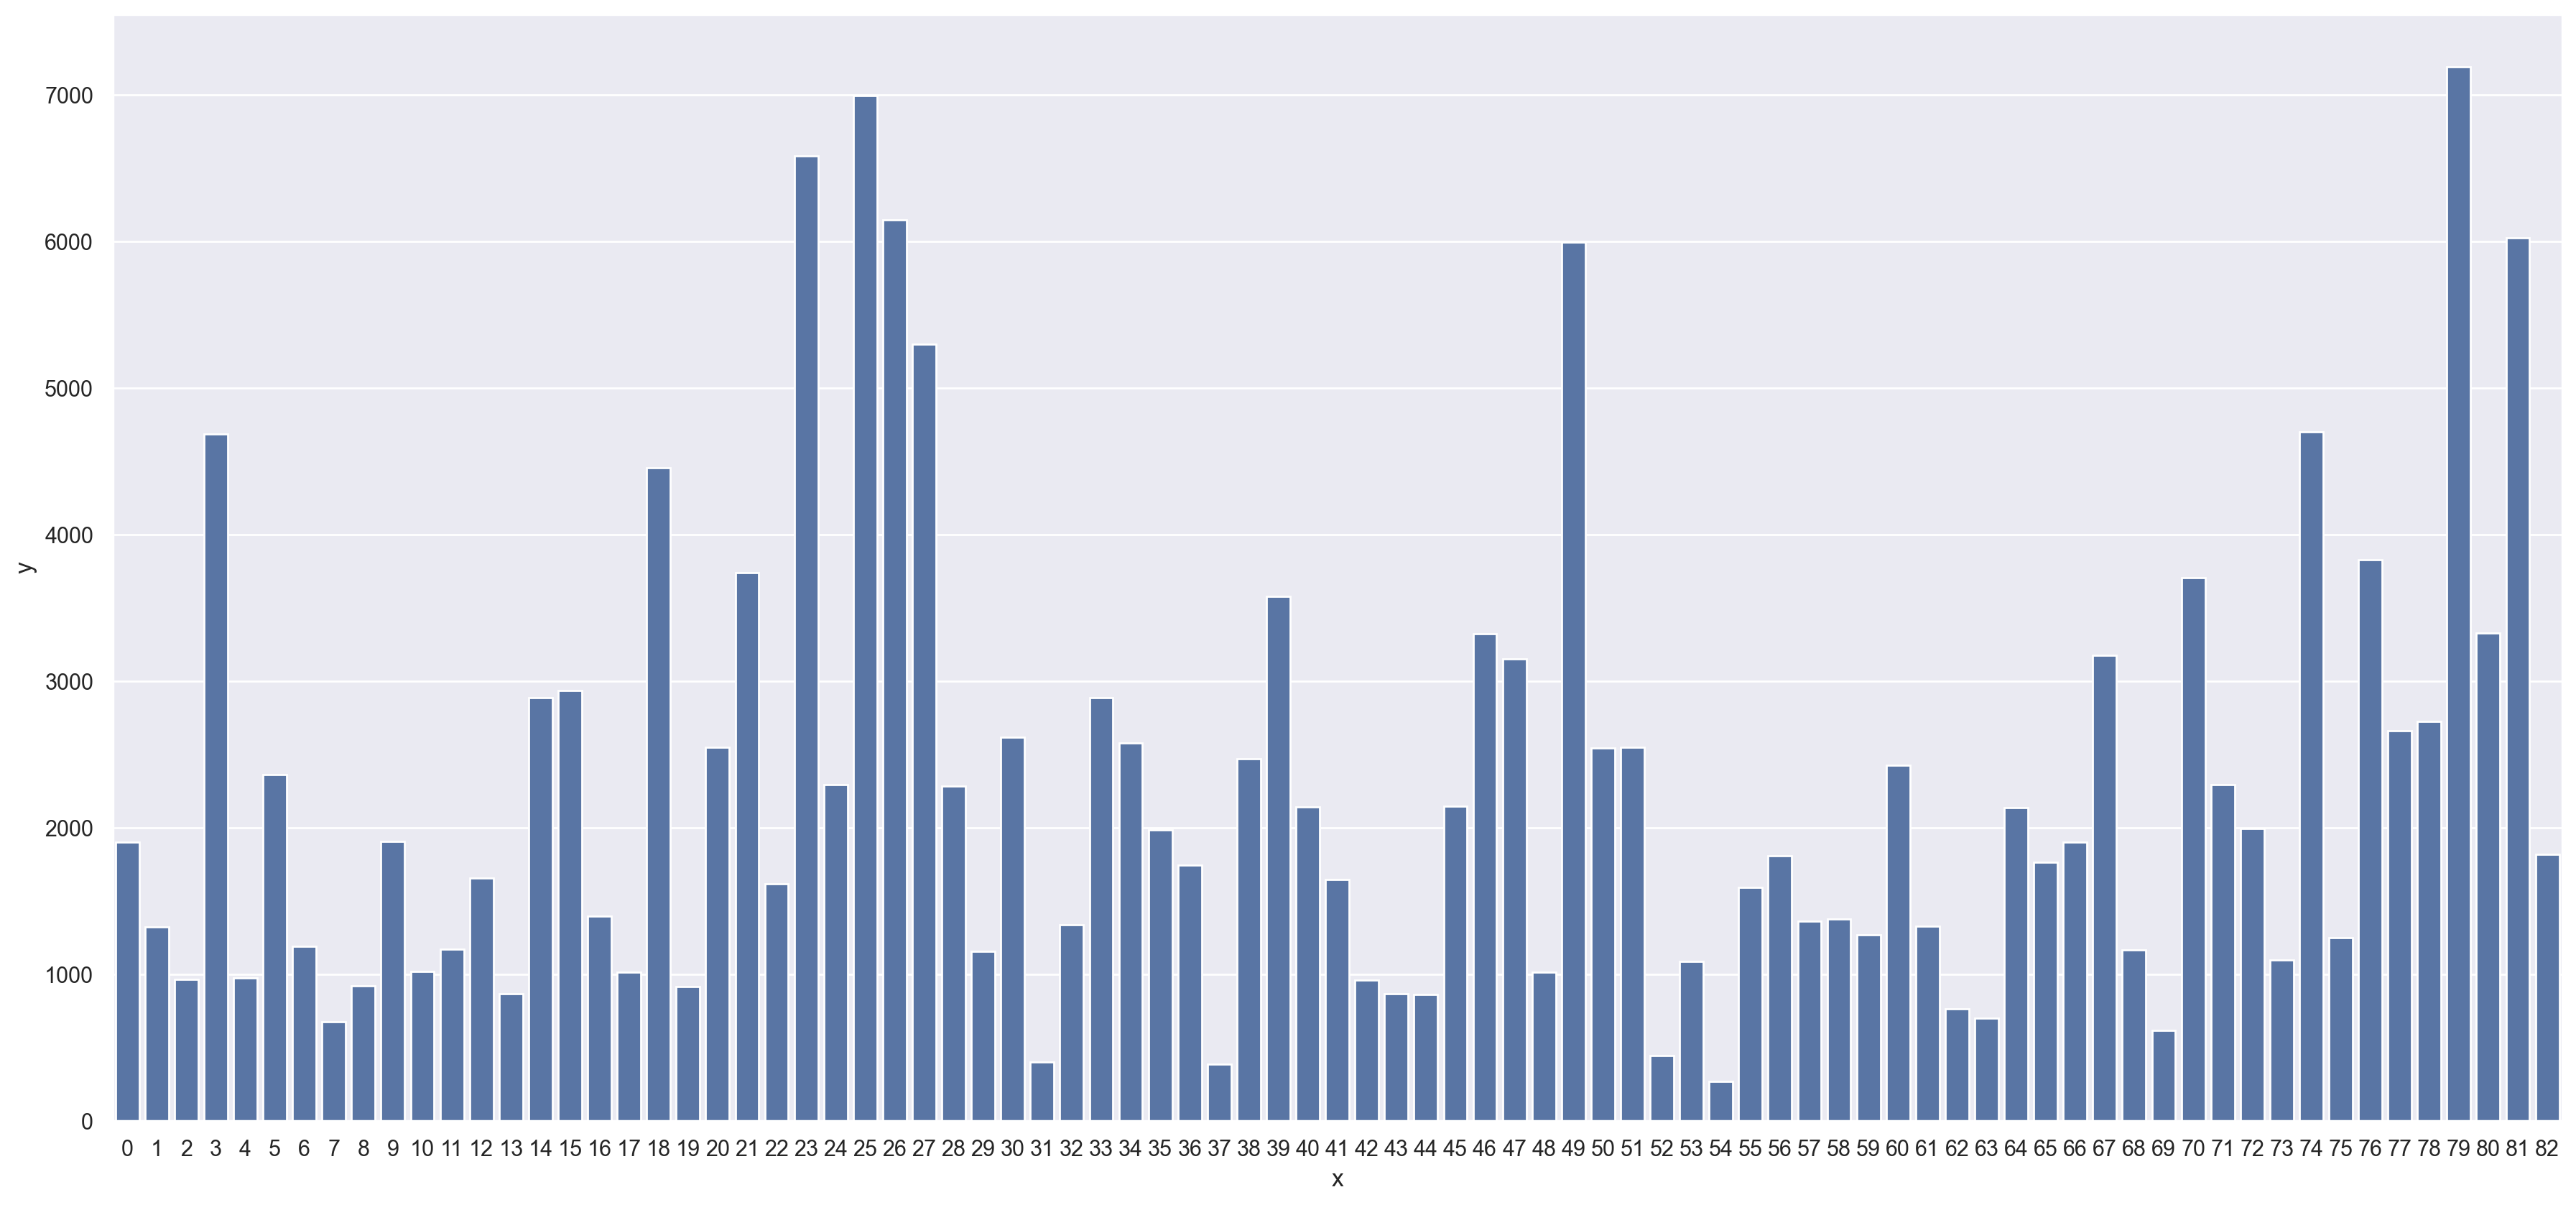

In [10]:
count_rows = []
for value in listdf:
  count_rows.append(value.shape[0])
raw_data = {'x': np.arange(len(count_rows)), 'y': count_rows}
sns.barplot(x='x', y='y', data=raw_data)